## Incremental Model Improvement With Filters And Masks

And now begins the work of data scientist. We have established a benchmark model. We should now begin to refine upon this model seeking to continually improve the benchmark performance that we have. We can do this by using exploratory data analysis to study the features, especially as they relate to the target. If we find a feature that we believe exhibits some pattern of correspondence to our target we can use this to refine our model.

For this project, we are going to think of our model as simply the values stored in a vector of predictions. For example, we already have one model, a model called `no_survivors`, which is simply a vector of zeros. To improve upon this model we will use a mask to reduce the number of values we are looking at and then replace these values with a 1. 

What if we try to improve our model by simply randomly replacing zeros with one? We can do this using the `sample()` function

In [1]:
source('init.r')

### Randomized Model Improvement

#### create a random mask

In [2]:
random_mask = sample(c(TRUE,FALSE), number_of_passengers, replace = TRUE)
random_mask[1:10]

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE

#### duplicate and filter to create random model

In [3]:
random_model = rep(no_survivors)
random_model[random_mask] = 1

#### assess accuracy of random model

In [4]:
accuracy(titanic$Survived, random_model)

[1] 0.5039282

As suspected, simply guessing is not better than guessing all zeros. It looks like we might actually justify our exorbitant salaries after all.

#### Use Proportion Tables To Look At Survival By Feature

Previously, we use a proportion table to look at a single feature, `Survived`. Next, We will use a proportion table to look at how two features interact with each other. Let's look at the structure of the dataframe again to remind ourselves which features we have available to us.

#### display the structure of the dataframe

In [5]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


First, we look at the proportions of `Pclass` and `Survived`. There are three different ways we can look at a proportion table. 

1. The values of each combination as a proportion of the whole
1. The values in each row as a proportion of that row
1. The values in each column as a proportion of that column

#### whole proportions of `Pclass` versus `Survived`

In [6]:
prop.table(table(titanic$Pclass, titanic$Survived))

   
             0          1
  1 0.08978676 0.15263749
  2 0.10886644 0.09764310
  3 0.41750842 0.13355780

#### proportions of `Pclass` versus `Survived` by row

In [7]:
prop.table(table(titanic$Pclass, titanic$Survived), 1)

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

####  proportions of `Pclass` versus `Survived` by column 

In [8]:
prop.table(table(titanic$Pclass, titanic$Survived), 2)

   
            0         1
  1 0.1457195 0.3976608
  2 0.1766849 0.2543860
  3 0.6775956 0.3479532

#### whole proportions of `Sex` versus `Survived`

In [9]:
prop.table(table(titanic$Sex, titanic$Survived))

        
                  0          1
  female 0.09090909 0.26150393
  male   0.52525253 0.12233446

#### proportions of `Sex` versus `Survived` by row

In [10]:
prop.table(table(titanic$Sex, titanic$Survived), 1)

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

####  proportions of `Sex` versus `Survived` by column 

In [11]:
prop.table(table(titanic$Sex, titanic$Survived), 2)

        
                 0         1
  female 0.1475410 0.6812865
  male   0.8524590 0.3187135

#### Analyze Proportion Tables

Using the results obtained about prepare an analysis ofhHow these two features can be used to predict whether or not someone survived the sinking of the Titanic.

### Targeted Model Improvement

We saw that randomly selecting values to be replaced by one did not improve our model. What if we use some more intelligent way to select values that should be replaced by a one in our vector of predictions? We just looked at two features and identified some patterns that showed it would be more likely to have survived the sinking of the ship. Based upon this work we might decide that it would be a better model to replace the prediction for all female passengers with a 1. We can do that using masks and filters.

#### create a mask of just women

In [12]:
women_mask = titanic$Sex == 'female'
women_mask[1:10]

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE

#### duplicate and filter to create a model, `women_survived`

In [13]:
women_survived = rep(no_survivors)
women_survived[women_mask] = 1

#### assess accuracy of  model, `women_survived`

In [14]:
accuracy(titanic$Survived, women_survived)

[1] 0.7867565

#### Explaining Creation Of Prediction Vector 

Explain in your own words the process by which the prediction vector, `women_survived`:

### Can Another Feature Help?

In [15]:
prop.table(table(titanic$Survived, titanic$Pclass, titanic$Sex))

, ,  = female

   
              1           2           3
  0 0.003367003 0.006734007 0.080808081
  1 0.102132435 0.078563412 0.080808081

, ,  = male

   
              1           2           3
  0 0.086419753 0.102132435 0.336700337
  1 0.050505051 0.019079686 0.052749719


#### create a mask of just first class

In [16]:
first_class_mask = titanic$Pclass == 1
first_class_mask[1:10]

[1] FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE

#### duplicate and filter to create a model, `women_and_first_class_survived`

In [17]:
women_and_first_class_survived = rep(women_survived)
women_and_first_class_survived[first_class_mask] = 1

#### assess accuracy of  model, `women_and_first_class_survived`

In [18]:
accuracy(titanic$Survived, women_and_first_class_survived)

[1] 0.7508418

In [19]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived))

#### Progress Report

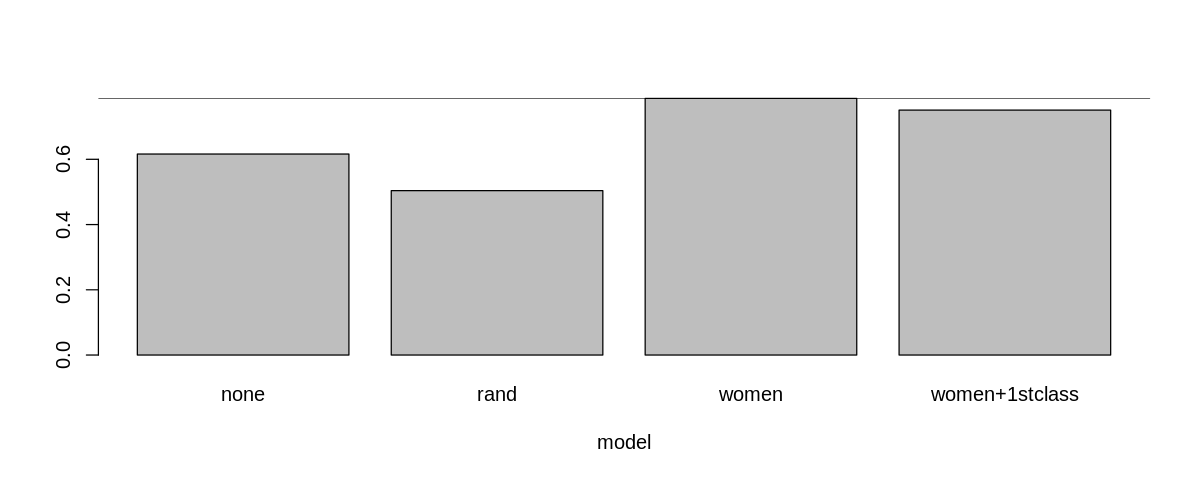

In [20]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass'))
abline(h = max(scores))